# Modeling

In [7]:
# fetches the data
import acquire
# credentials file to access the data
import env
# Imports functions necessary to run visuals and hides unnecessary code
import wrangle_zillow

# coding 
import math
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy.stats
import scipy
import os

# needed for modeling
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

1) Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

    a) Choose features other than the ones used in the lesson.
    b) Visualize the results of your clustering.
    c) Use the elbow method to visually select a good value for k.
    d) Repeat the clustering, this time with 3 different features.


In [8]:
df = sns.load_dataset('iris')

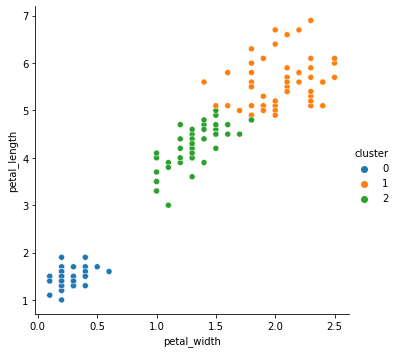

In [9]:
X = df[['petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster'] = kmeans.labels_
df.cluster = df.cluster.astype('category')

sns.relplot(data=df, y='petal_length', x='petal_width', hue='cluster')

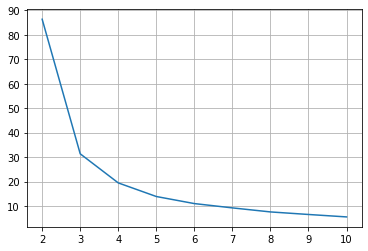

In [10]:
inertias = {k: KMeans(n_clusters=k).fit(X).inertia_ for k in range(2, 11)}
pd.Series(inertias).plot()
plt.grid()

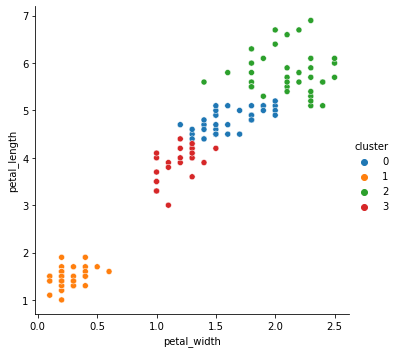

In [11]:
X = df[['petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df['cluster'] = kmeans.labels_
df.cluster = df.cluster.astype('category')

sns.relplot(data=df, y='petal_length', x='petal_width', hue='cluster')

Text(0.5, 0.98, "clusters based on ['sepal_length', 'sepal_width']")

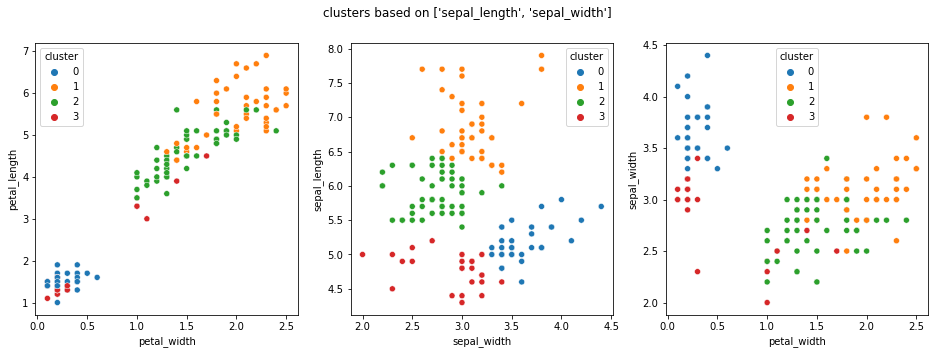

In [14]:
X = df[['sepal_length', 'sepal_width']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df['cluster'] = kmeans.labels_
df.cluster = df.cluster.astype('category')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(data=df, y='petal_length', x='petal_width', hue='cluster', ax=ax1)
sns.scatterplot(data=df, y='sepal_length', x='sepal_width', hue='cluster', ax=ax2)
sns.scatterplot(data=df, y='sepal_width', x='petal_width', hue='cluster', ax=ax3)
fig.suptitle(f'clusters based on {X.columns.tolist()}')

***

2) Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to          perform clustering on the mall customers dataset. Be sure to visualize your results!

3) How does scaling impact the results of clustering?

- Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

#### Bonus
  a) Read in the data from this google [sheet](https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing):
  
  b) Visualize the data and guess the number and shape of the clusters.
  
  c) Implement the KMeans algorithm on unscaled data and visualize the clusters.
  
  d) Repeat the step above but with scaled data.
  
  c) Write down the takeaways from this exercise.

In [15]:
def acquire():
    database = 'mall_customers'
    url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{database}'
    df = pd.read_sql('SELECT * FROM customers', url, index_col='customer_id')
    return df

In [16]:
df = acquire()

In [33]:
df

,gender,age,annual_income,spending_score,cluster
customer_id,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,1
4,Female,23,16,77,1
5,Female,31,17,40,1
...,...,...,...,...,...
196,Female,35,120,79,3
197,Female,45,126,28,3
198,Male,32,126,74,3


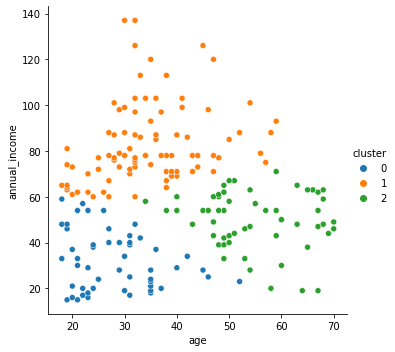

In [20]:
X = df[['age', 'annual_income']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['cluster'] = kmeans.labels_
df.cluster = df.cluster.astype('category')

sns.relplot(data=df, x='age', y='annual_income', hue='cluster')

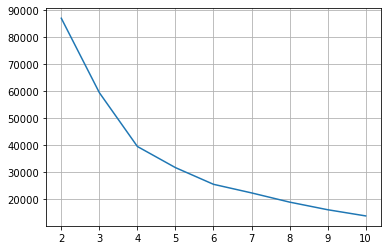

In [21]:
inertias = {k: KMeans(n_clusters=k).fit(X).inertia_ for k in range(2, 11)}
pd.Series(inertias).plot()
plt.grid()

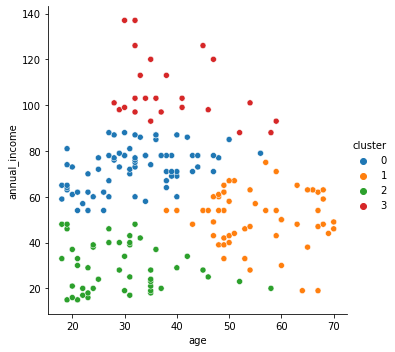

In [23]:
X = df[['age', 'annual_income']]

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
df['cluster'] = kmeans.labels_
df.cluster = df.cluster.astype('category')

sns.relplot(data=df, x='age', y='annual_income', hue='cluster')

Text(0.5, 0.98, "clusters based on ['age', 'annual_income']")

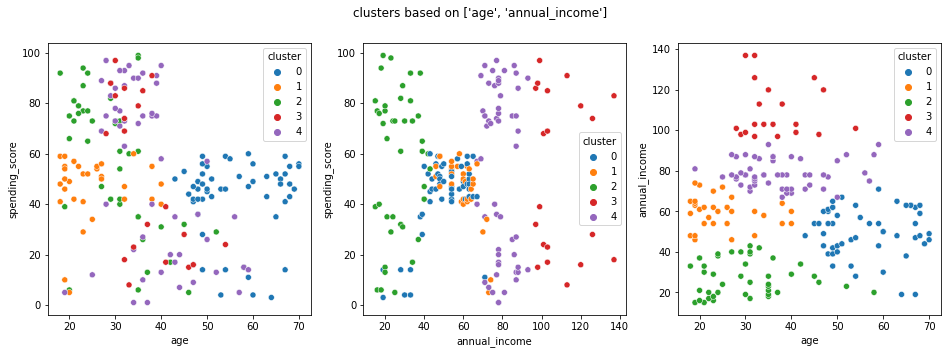

In [36]:
X = df[['age', 'annual_income']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
df['cluster'] = kmeans.labels_
df.cluster = df.cluster.astype('category')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

sns.scatterplot(data=df, y ='spending_score', x='age', hue='cluster', ax=ax1)
sns.scatterplot(data=df, y='spending_score', x='annual_income', hue='cluster', ax=ax2)
sns.scatterplot(data=df, y='annual_income', x='age', hue='cluster', ax=ax3)
fig.suptitle(f'clusters based on {X.columns.tolist()}')

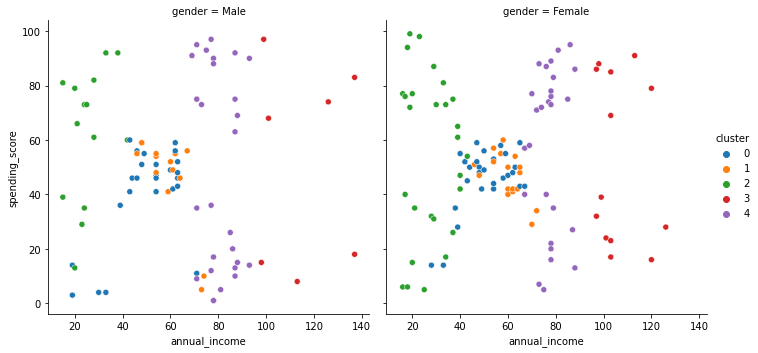

In [37]:
sns.relplot(data=df, hue='cluster', col='gender', y='spending_score', x='annual_income')